In [1]:
import sys

In [2]:
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pandas as pd
from munc13 import Munc13, Solver

In [4]:
import sys
print(sys.path)

['/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python310.zip', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/lib-dynload', '', '/opt/homebrew/anaconda3/envs/optimization_env_munc/lib/python3.10/site-packages']


In [5]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

In [6]:
# this is used to create the model for analysis and plotting without running the GA
parameter_ranges = {
        "kfsr":      {"min": 0.001, "max": 10},   # kfSR uM-1s-1
        #"krsr_nostim":      {"min": 0.1,   "max": 1000}, # krSR_nostim
        "krsr":       {"min": 0.001,   "max": 1000}, # krSR_stim s-1
        "kfmm":      {"min": 0.001, "max": 10},   # kfMM uM-1s-1
        "krmm":      {"min": 0.01,   "max": 1000}, # krMM s-1
        "kfmx":      {"min": 0.001, "max": 10},   # kf1x uM-1s-1
        "krmx":      {"min": 0.01,   "max": 1000}, # kr1x s-1
       # "kfc_nostim":      {"min": 0.001, "max": 10},   # kfc_nostim
        "kfc":      {"min": 0.1, "max": 10},   # kfc_stim uM-1s-1
        "krc":      {"min": 0.01, "max": 100},   # krc
        "kfxx":      {"min": 0.01, "max": 10},   # kx2 uM-1s-1
        "krxx":      {"min": 0.01,   "max": 1000}, # krx2 s-1
        "eLoop":       {"min": 1,   "max": 100}, # sig, scale factor >1
        "eDF":      {"min": 0.001,   "max": 1}, # exp(free energy kT units <0).
        "kfdd":     {"min": 0.01,   "max": 1}, # kfdd unimolecular: s-1
        "stimUpSR":       {"min": 1,   "max": 100}, # stimUpSR: scale factor >1
        "S0":        {"min": 0.001, "max": 10},   # S0 (uM)
        "R0":        {"min": 1, "max": 1000},   # R0 (/um^2)
        #"D1":        {"min": 0.05,   "max": 5}, # D1
        #"D1_over_D2":        {"min": 1.5,   "max": 5}, # D2
        "X0":        {"min": 0.1,   "max": 100}, # X0  (/um^2)
         
}

# Order in which the solver will read parameters from a candidate
params_to_optimize = np.array([
        "kfsr","krsr","kfmm","krmm","kfmx","krmx","kfc","krc","kfxx","krxx","eLoop","eDF","kfdd","stimUpSR","S0","R0","X0"
])
# Instantiate the model and solver
maxTime=1000.0
model = Munc13(parameter_ranges, params_to_optimize, t_max=maxTime)

Gamma is 333.3333333333333


# use a specific parameter set and look at the solution.
# only prestimulation

[7.56309799e-01 4.17386206e-03 1.44589710e-04 4.65129889e-06
 4.33486465e-08 4.19778854e-11 6.58753175e-10 6.59106352e-12
 3.94211410e-07 9.52417946e-15 2.81210480e-09 9.22679128e-18
 2.72328991e-12 3.23736739e-17 1.35278697e-12 1.14490629e-06
 2.46848884e-12 2.42241892e-07 2.39029940e-15 2.34575717e-10
 2.12170781e-14 6.52990728e-11 1.42824198e-05]
[0.009922313848025562, 0.21660715502295752, 1.3631282058673133, 2.0419654660812707, 3.3252676655491675, 165.49929717358265, 0.20146550300976532, 0.016589842939129663, 4.740332611854213, 0.015509378285201018, 0.651165848700184, 0.03730084543444053, 0.049386303013569895, 4.037977792193313, 0.7565557311994856, 8.869051635813294, 0.09292593309853167]
CHI PRE STIMULATION
Cluster density chi: Simulated 0.02866065758624748, Experimental 0.024375, Chi -0.15456661414594036
Small cluster density chi: Simulated 0.0027835571612542767, high density 0.02866065758624748, Chi 0
Percent of mem munc13 in clusters: 34.84556452440402%. Percent munc13 on the me

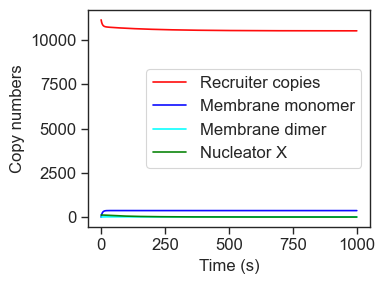

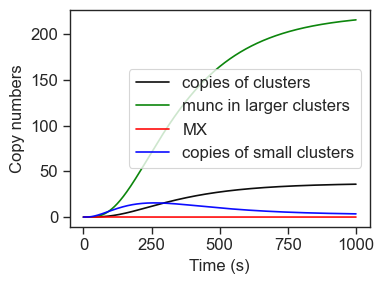

<Figure size 640x480 with 0 Axes>

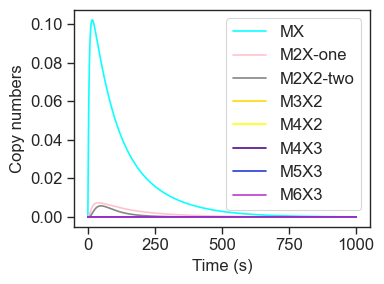

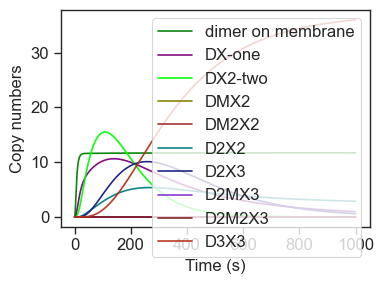

In [7]:
low1 = [0.19280917492092398, 6.345538383656195, 0.008338623061696039, 931.9281949916707, 0.027897164735378663, 0.21029166797357027, 3.6072743741489997, 16.52103503237623, 3.096341754360337, 0.6511235557542634, 2.9152867028351985, 0.004189366876445601, 0.022275726101785066, 23.831007837665823, 0.034463996588883834, 291.8346780370225, 4.199891525170765]
#low2=[0.19281, 6.3455, 0.0058888, 687.39, 0.027897, 0.21029, 3.6073, 16.521, 3.0963, 0.65112, 3.2166, 0.0031555, 0.022276, 23.831, 0.034464, 291.83, 4.1999]
#low2=[0.15019457492757146, 0.03471466177364948, 0.001, 0.0125695557090747, 0.06308754971859099, 0.566048703443486, 0.8858951965514484, 0.1816697295206523, 1.8467048647080402, 14.382393363562, 1.3345243036308372, 0.09280810695255375, 1, 5.471073149025038, 0.007646756200094223, 37.45702488861859, 0.35135134493885456]
low2=[0.2642125034075746, 0.2887430048874226, 1.6090821155934083, 0.9339522784014574, 0.0029483178916808283, 0.03148546107207491, 4.730291198372777, 4.187508823465768, 3.140067712202445, 0.06044918318120396, 24.86495534604118, 0.001, 0.09979599251960969, 13.159337961874357, 0.01, 121.85346254917246, 0.1094248861967725]
low2=[2.554781287140369, 0.001, 0.45078463135134816, 74.97397732485449, 0.1729522922844633, 497.2479634054802, 1.0259267953913058, 6.922804010289599, 0.05869353556121985, 0.07168986420329185, 2.349022359735784, 0.0025017744965558516, 0.035363164065782486, 27.10725738226453, 0.01, 205.3792639259202, 1.121801550165552]
low2=[0.9946394627161883, 0.03913110722654638, 7.557328626040687, 5.995902915346929, 0.9767574538872277, 37.4174610576011, 2.91250063991091, 0.11581759114661289, 0.6435467636367203, 30.304943014787305, 2.1181610785330225, 0.005278769491172638, 0.4033842130257309, 48.77474143281317, 0.01, 3.1755443550470797, 0.8472192758481225]
lowTest=[9.000341884408902, 0.001, 0.024874081496655306, 0.18619385334523933, 1.5027275186336115, 406.2476863737097, 0.34554369849414646, 0.5389525829509899, 3.2397843239161377, 122.75020447937611, 2.671091038217679, 0.0009596841693235142, 0.013642994096301929, 9.563695488995796, 0.01, 1.3955596985512482, 5.234777784627565]
low2=[0.07168257454819948, 0.013250901151912279, 0.004898390282115934, 0.8758297953223384, 3.0424560522918997, 0.5572946032144557, 3.380906989562066, 0.0873201942154376, 1.6329657453578934, 47.58625094166674, 3.994944925982537, 0.010344239213141886, 0.017846178557934616, 53.66285530759832, 0.02392708322122757, 2.180465003084446, 0.07362772364763508]
low2=[0.009840190744736778, 0.005103239115502532, 0.09037598420450445, 0.7831321568865671, 0.257155191043146, 0.21531707683658483, 1.8378317842744623, 1.9294226293609646, 6.960284600985927, 0.01, 2.185450593378016, 0.0001, 0.10045940175122406, 2.815740269955859, 0.003006690706092946, 173.2135416363489, 0.07298027543502422]
low2=[5.8837131875473565, 0.6572287813697282, 0.06490826608473303, 2.5863243030855982, 6.629413671535382, 1.1590395496058348, 0.5327385824001332, 0.05289095028927658, 4.165119397109582, 71.15489567065158, 7.1352032355788575, 0.008099018621459444, 0.17296144323535587, 1.191167100732555, 0.08761845157322122, 1.2083098651627855, 0.07680065438914549]
low2=[3.168689876521802, 0.0012264160429219806, 1.2326444660457405, 0.0459870953288317, 7.790016264189948, 0.6982710570975792, 0.6255438567639025, 0.05068283053795606, 1.1843839983463484, 6.371282359799749, 6.087023864946885, 0.014711656989551273, 0.01000759860969436, 7.770401125890258, 0.001, 273.0267339638671, 0.06324291971928848]
low2=[6.857017031825865, 44.07774580033118, 0.46509602833326014, 0.41125621867458395, 0.2582282665310926, 0.014430544872312146, 0.2952223146486258, 0.10575464051767629, 10, 0.7678971603389042, 0.00732273460206515, 0.043771339432393114, 0.23087665463186352, 45.29263770939414, 0.06277682126126248, 60.7406661534452, 0.069389012282451]
low2=[0.157793987088382, 0.005735011169217226, 0.19915412393565862, 1.6405340780468105, 0.44545068953623623, 2.742639756834301, 0.14476212777582723, 2.0820928874892366, 0.6511769339465802, 151.27627030149714, 0.0014882370056972418, 0.0037596162931540908, 0.06118387651552151, 3.019325668201894, 0.6877597553190984, 420.6589798363307, 0.1122205524709933]
low2=[3.480686623367432, 0.0016480081974359327, 0.0030815916573929056, 11.332675376682245, 5.101728075903431, 0.09119137427451547, 0.5557895174628356, 0.01338699228543868, 0.22802739252857335, 0.3758984600314494, 0.031701848263439206, 0.0011659372311822636, 0.03456053180508272, 11.239612698996293, 0.006758504907356912, 0.3179617656838966, 0.13372661881556638]
low2=[5.011253603461117, 0.008698236283139066, 0.7955587199575441, 0.16057999681071258, 0.24882002663242228, 0.013920984672360996, 0.01914571388077188, 0.012501480379403821, 9.603613501918618, 357.1498667681548, 0.009360162318253, 0.0018848626211645707, 0.020479171439686812, 2.465396663622287, 1.8348017612846805, 1.7441776100947617, 0.17757278789640804]
low2=[0.01051421526525053, 0.03044072930912493, 0.1, 1.8935990019766906, 1.7632516989451745, 0.08924386093927962, 7.320899056342131, 0.01039410587275648, 2.1392965322906576, 0.35951349977594294, 0.1986384394523206, 0.23281057205768915, 0.16338116994347227, 74.68547919571311, 1.0473194764606142, 0.5038548147155066, 0.1]
low2=[1.1990145978837494, 64.84254182874511, 0.3838997280253884, 0.5427768726647392, 1.782850339268213, 148.8899140208131, 10, 1.9088670410827975, 1.8204514120747222, 0.0197967436179174, 0.001621974347079779, 0.011528162104348018, 0.5023000634811141, 3.676618776948492, 4.9767507118835805, 88.0721048124962, 0.1]
low2=[2.121177520516991, 0.18396834046949065, 0.19312006429749384, 0.012332182349836877, 0.5458031598843938, 11.623217761695415, 0.3984679351530142, 110.95683127190667, 1.9578523880296688, 1.0367969503082282, 0.02027056531990607, 0.00514486221193805, 0.606821603097497, 3.9595525238802867, 0.004799261263367555, 4.54159101445122, 0.09641561281550895]
low2=[0.82439, 0.27787, 0.14369, 0.70141, 1.2516, 0.071342, 1.3639, 0.080172, 0.098181, 0.3466, 0.16538, 0.031533, 0.017389, 1.7038, 0.13265, 50.545, 0.11378]
low2=[0.28005689619623975, 7.1170241978440725, 8.697432960203972, 1.157742601671254, 9.009252720524655, 0.18237412569868677, 0.0027360275004156766, 0.044042042263975525, 0.8238317084168036, 18.457812364107312, 1, 0.001, 0.43766442299408775, 4.8471506068564985, 0.00709446604372207, 363.86085241862236, 0.1388434874560452]
low2=[0.009922313848025562, 0.21660715502295752, 1.3631282058673133, 2.0419654660812707, 3.3252676655491675, 165.49929717358265, 0.20146550300976532, 0.016589842939129663, 4.740332611854213, 0.015509378285201018, 0.651165848700184, 0.03730084543444053, 0.049386303013569895, 4.037977792193313, 0.7565557311994856, 8.869051635813294, 0.09292593309853167]
test_candidate=low2
sol=model.simulate_pre(test_candidate)
print(sol[:,-1])
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(sol)
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_cluster_kinetic(sol, figsize=(4, 3), fontsize=12

Initial total Munc13 1906183.050223981, final total Munc 1906802.8900969622
Initial total R 10519.690641793068, final total R 11139.528854471213
Initial total X 0.10925477272211505, final total X 116.71497217042074


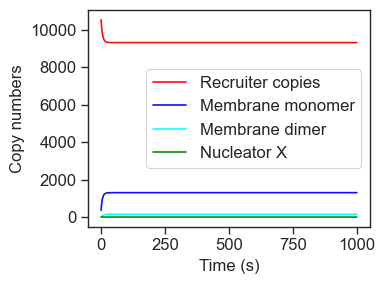

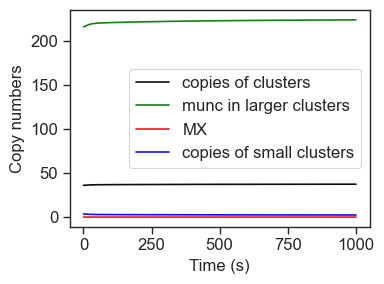

<Figure size 640x480 with 0 Axes>

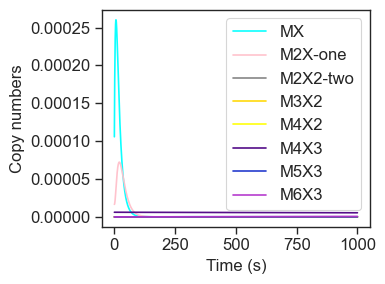

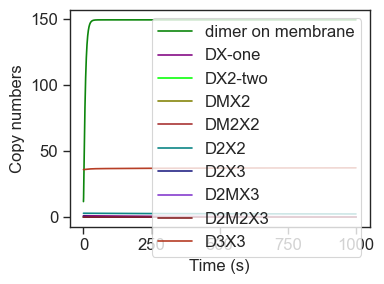

differential post and pre [-1.21354804e+03 -1.21354970e+03  9.36638571e+02  1.37726987e+02
 -1.09194461e-01 -1.05591459e-04 -1.65938803e-03 -1.64987117e-05
 -8.55560564e-01 -2.39934742e-08 -6.83055939e-03 -2.32168877e-11
 -5.97515843e-06 -8.15851305e-11 -1.22749928e-06 -5.36708785e-01
 -7.10082875e-07 -6.10538590e-01  1.30264262e-08 -5.91213490e-04
  6.97056320e-07 -1.28183547e-04  1.29580120e+00]
ratio post and pre  [9.99363362e-01 8.84640173e-01 3.57021689e+00 1.27484324e+01
 5.52023915e-04 1.97054860e-03 5.51651262e-04 6.81612239e-03
 1.38893848e-01 4.58818980e-04 3.62599807e-02 1.63711386e-03
 1.29456108e-01 1.05572111e-04 6.39979724e-01 8.14003880e-01
 8.85866537e-01 2.31783066e-06 3.16226094e+00 8.27382260e-06
 1.40351916e+01 2.21138216e-01 1.03599745e+00]
copies pre:  [1.90618305e+06 1.05196906e+04 3.64420051e+02 1.17230097e+01
 1.09254773e-01 1.05799943e-04 1.66030394e-03 1.66119407e-05
 9.93559925e-01 2.40044879e-08 7.08755396e-03 2.32549587e-11
 6.86370726e-06 8.15937445e-11 

In [8]:
#what is the total recruitment to the membrane and how does it change following dimer deletion?
solPost=model.simulate_post(test_candidate, sol)
model.test_mass_conservation(solPost)
model.plot_freespecies_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(solPost, figsize=(4, 3), fontsize=12, dpi=300)

#calculate the change in each final species pre and post
change=solPost[:,-1]-sol[:,-1]
ratio=solPost[:,-1]/sol[:,-1]
print("differential post and pre", change*model.cellVolume*602)
print("ratio post and pre ", ratio)
print("copies pre: ", sol[:,-1]*model.cellVolume*602)
print("copies post: ", solPost[:,-1]*model.cellVolume*602)

In [9]:
pclus, pclusMem, pmem, pMono, pDimer = model.calc_percentages_cluster(sol)
copies= sol*model.cellVolume*602
print(copies[:,-1])
print("percent on mem in cluster", pclusMem)
print("percent on membrane ", pmem)
D_wt = model.calculate_population_average_diffusion(sol)
print("average populations diffusivity: ", D_wt)

print("RESULT POST STIMULATION: ")
pclus, pclusMem, pmem, pMono, pDimer = model.calc_percentages_cluster(solPost)
copies= solPost*model.cellVolume*602
print(copies[:,-1])
print("percent on mem in cluster", pclusMem)
print("percent on membrane ", pmem)
D_wt = model.calculate_population_average_diffusion(solPost)
print("POST STIM average populations diffusivity: ", D_wt)

[1.90618305e+06 1.05196906e+04 3.64420051e+02 1.17230097e+01
 1.09254773e-01 1.05799943e-04 1.66030394e-03 1.66119407e-05
 9.93559925e-01 2.40044879e-08 7.08755396e-03 2.32549587e-11
 6.86370726e-06 8.15937445e-11 3.40952820e-06 2.88559129e+00
 6.22151345e-06 6.10540005e-01 6.02444687e-09 5.91218381e-04
 5.34749578e-08 1.64578042e-04 3.59970301e+01]
percent on mem in cluster 0.34845564524404016
percent on membrane  0.00032506674701247173
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X3, 0.0003252032520325203. DtD3X3 0.0003252032520325203. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 619.8382126777992. M 364.4200506024253. D 11.723009692621163. 
average populations diffusivity:  0.04867409034508542
RESULT POST STIMULATION: 
[1.90496950e+06 9.30614095e+03 1.30105862e+03 1.49449997e+02
 6.03112473e-05 2.08483929e-07 9.15908762e-07 1.13229021e-07
 1.37999361e-01 1.10137147e-11 2.56994570e-04 3.80710153e-14
 8.88548827e-07 8.61402383e-15 2.18202891e-06 2.34888251e+00
 5.51143057e-06 1

In [10]:
copies= sol * model.cellVolume * 602  # converts from uM to copy numbers.
density = model.calculate_cluster_density(sol)
print("dimensions of density array: ",density.shape)
print("length of density array : ", len(density))
L=copies.shape[1]
print(L)
n75=np.int64(L*0.75)
#look at change in copy numbers over the final 75%. >0 means increasing
print(copies.shape)
delta = copies[:,-1]-copies[:,n75]
mx=copies[5]
x=copies[4]
print("75% mx ", mx[n75])
print("final mx: ", mx[-1])
print("75percent  x ", x[n75])
print("final X: ", x[-1])
print("initial total Munc ", copies[0][0])
print("initial total R ", copies[1][0])
print("initial total X ", copies[4][0])
        
print("binding of X to X, and dGXX (kT)", test_candidate[8], test_candidate[9], np.log(test_candidate[9]*1e-6/test_candidate[8]))
print("binding of M to X, and dGMX: ", test_candidate[4], test_candidate[5],np.log(test_candidate[5]*1e-6/test_candidate[4]))
print("binding of M to cluster, and dGC: ", test_candidate[6], test_candidate[7], np.log(test_candidate[7]*1e-6/test_candidate[6]))

print("binding of S to R, dGSR: ", test_candidate[0], test_candidate[1], np.log(test_candidate[7]*1e-6/test_candidate[6]))
print(" dimerization, dGMM ", test_candidate[2], test_candidate[3], np.log(test_candidate[3]*1e-6/test_candidate[2]))
print(" dimerization dG gain, speedup ", test_candidate[11], test_candidate[10])
print(" convert from monomers to dimer in cluster ", test_candidate[12])
print(delta.shape)
print(delta)

dimensions of density array:  (2001,)
length of density array :  2001
2001
(23, 2001)
75% mx  0.0005533429132289374
final mx:  0.00010579994284750144
75percent  x  0.5713458426452106
final X:  0.10925477272211505
initial total Munc  1906802.8900956851
initial total R  11139.5288545815
initial total X  116.71497197175577
binding of X to X, and dGXX (kT) 4.740332611854213 0.015509378285201018 -19.537928249854787
binding of M to X, and dGMX:  3.3252676655491675 165.49929717358265 -9.908093781626311
binding of M to cluster, and dGC:  0.20146550300976532 0.016589842939129663 -16.31233808679417
binding of S to R, dGSR:  0.009922313848025562 0.21660715502295752 -16.31233808679417
 dimerization, dGMM  1.3631282058673133 2.0419654660812707 -13.411379959998431
 dimerization dG gain, speedup  0.03730084543444053 0.651165848700184
 convert from monomers to dimer in cluster  0.049386303013569895
(23,)
[-3.75430817e+00 -3.76133042e+00 -4.18386464e-02  2.08519212e-03
 -4.62091070e-01 -4.47542970e-04 

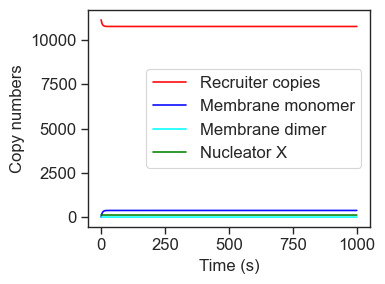

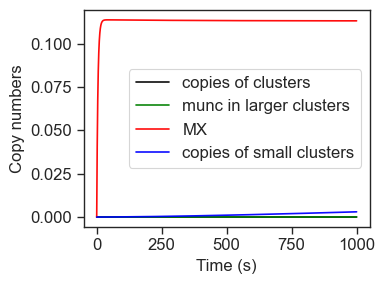

<Figure size 640x480 with 0 Axes>

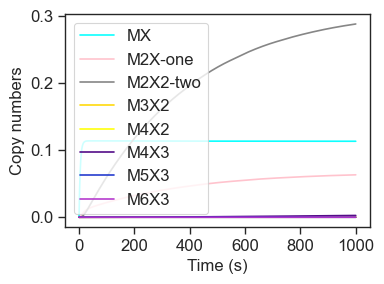

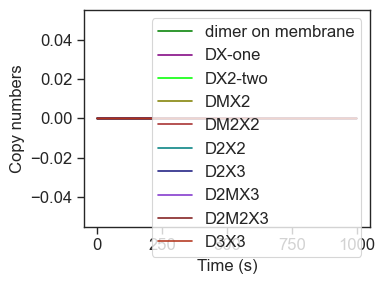

In [11]:
# Now evaluate the mutants, which will require new simulations
#first is the mutant C2A, which eliminates dimerization.
candidate_dc2a=list(test_candidate)
candidate_dc2a[2] = 0 #this sets kfmm to zero.
candidate_dc2a[12] = 0 #this sets kfdd to zero (no in cluster transition to 2M->D)
        
mutantC2A_pre = model.simulate_pre(candidate_dc2a)


model.plot_freespecies_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutantC2A_pre, figsize=(4, 3), fontsize=12, dpi=300)

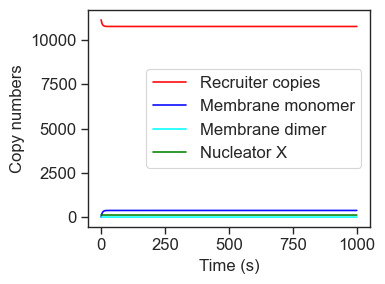

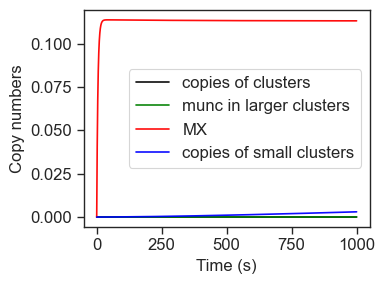

<Figure size 640x480 with 0 Axes>

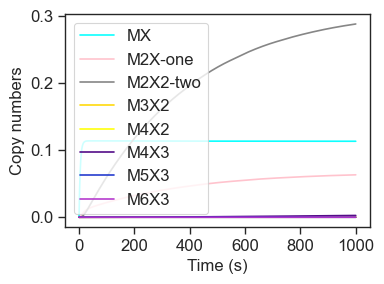

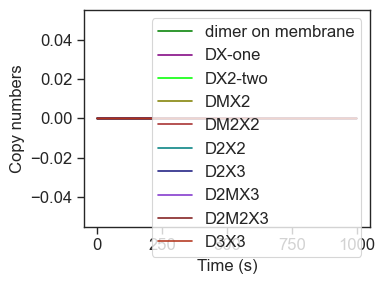

In [12]:
mutantC2A_post = model.simulate_pre(candidate_dc2a)


model.plot_freespecies_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(mutantC2A_post, figsize=(4, 3), fontsize=12, dpi=300)

CALCULATE DIFFUSIVITY OF WT AND MUTAN

In [13]:
print("percent on mem in cluster", pclusMem)
print("percent on membrane ", pmem)
print("percent in monomers on mem: ", pMono)
print("percent in dimers on membrane: ", pDimer)
pclus, pclusMem, pmem, pMono,pDimer = model.calc_percentages_cluster(mutantC2A_pre)
print("MUTANT percent on mem in cluster", pclusMem)
print("MUTANT percent on membrane ", pmem)
print("MUTANT percent in monomers on mem: ", pMono)
print("MUTANT percent in dimers on membrane: ", pDimer)
D_wt = model.calculate_population_average_diffusion(sol)
print("average populations diffusivity: ", D_wt)
D_mutant = model.calculate_population_average_diffusion(mutantC2A_pre)
print("MUTANT average populations diffusivity: ", D_mutant)

percent on mem in cluster 0.12204575457984243
percent on membrane  0.0009614983894118245
percent in monomers on mem:  0.7096472141197622
percent in dimers on membrane:  0.16303150709574288
MUTANT percent on mem in cluster 2.1449744157632823e-07
MUTANT percent on membrane  0.00019606154116271602
MUTANT percent in monomers on mem:  0.9977871113048323
MUTANT percent in dimers on membrane:  0.0
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X3, 0.0003252032520325203. DtD3X3 0.0003252032520325203. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 619.8382126777992. M 364.4200506024253. D 11.723009692621163. 
average populations diffusivity:  0.04867409034508542
DtM, 0.08. DtX 0.001. DtD 0.04
DtM6X3, 0.0003252032520325203. DtD3X3 0.0003252032520325203. DtMX 0.0009876543209876543. DtDX 0.000975609756097561
memMunc 373.85071332882217. M 373.02342331161645. D 0.0. 
MUTANT average populations diffusivity:  0.07982436936062987


[0.75655573 0.75653934 0.75652529 ... 0.7563098  0.7563098  0.7563098 ]
[0.009922313848025562, 0.21660715502295752, 1.3631282058673133, 2.0419654660812707, 3.3252676655491675, 165.49929717358265, 0.20146550300976532, 0.016589842939129663, 4.740332611854213, 0.015509378285201018, 0.651165848700184, 0.03730084543444053, 0.049386303013569895, 4.037977792193313, 0.7565557311994856, 8.869051635813294, 0.09292593309853167]
CHI PRE STIMULATION
Cluster density chi: Simulated 0.02866065758624748, Experimental 0.024375, Chi -0.15456661414594036
Small cluster density chi: Simulated 0.0027835571612542767, high density 0.02866065758624748, Chi 0
Percent of mem munc13 in clusters: 34.84556452440402%. Percent munc13 on the membrane: 0.03250667470124717%. Monomer mem: 58.79276933057628%. Dimer mem: 3.782603089917901%
Change in density over last 25%: 0.0017487878662601868, associated chi: -0.08813575397835696
**CHI POST STIMULATION
Cluster density chi: Simulated 0.02969177423876633, Experimental 0.0412

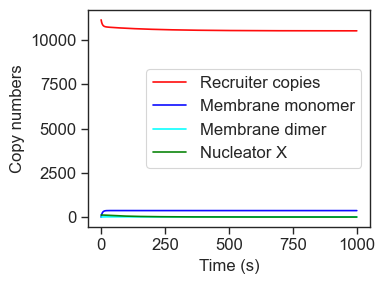

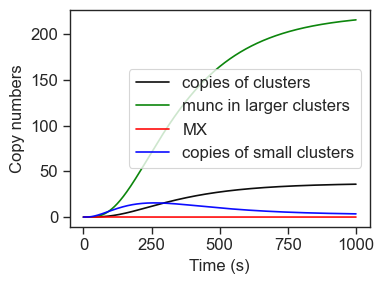

<Figure size 640x480 with 0 Axes>

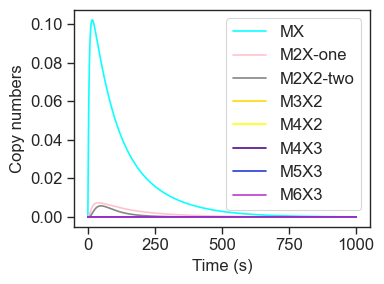

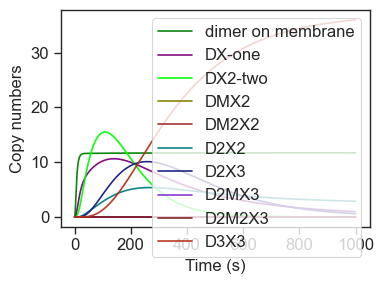

In [14]:
sol=model.simulate_pre(test_candidate)
print(sol[0])
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(sol)
model.plot_freespecies_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(sol, figsize=(4, 3), fontsize=12, dpi=300)

In [15]:
#check what happents to the WT when ksr is lowered 
pip_candidate = list(low2)
pip_candidate[0]=low2[0]*0.01
#[ 4.96837050e+00  3.55095404e-02  3.26229677e-03  2.50912413e-03
#  8.07949209e-15  1.04750784e-16  4.80498959e-16  5.47005971e-16
#  2.20774808e-08  3.90765317e-21  2.48683319e-13  5.08853104e-23
##  3.23879314e-15  2.90078902e-22  1.84998305e-14  8.14878120e-06
 #-2.29054119e-23  2.46609799e-17 -2.41364978e-25  2.99265062e-19
 # 8.55263608e-11  2.56303563e-14  1.11713300e-05]
pipSol=model.simulate_pre(pip_candidate)
print(pipSol[:,-1])
#pipPost=model.simulate_post(pip_candidate, pipSol)
fit=model.fitness_function_to_call(pip_candidate)

[7.56553455e-01 4.41820960e-03 1.53094180e-06 5.08942464e-10
 4.55690861e-05 4.67237892e-10 6.92692357e-07 3.97956168e-13
 4.76432643e-09 4.42468527e-13 2.07583345e-08 4.53676722e-18
 2.12841535e-13 8.11981477e-21 3.72062629e-16 6.47170589e-13
 5.68385185e-19 2.49270491e-11 5.83023450e-24 2.55840573e-16
 3.90388545e-25 3.68134026e-19 9.01001919e-15]
CHI PRE STIMULATION
Cluster density chi: Simulated 1.8594230656857032e-11, Experimental 0.024375, Chi -4.999999992371598
Small cluster density chi: Simulated 5.1746793085529374e-08, high density 1.8594230656857032e-11, Chi -5.174493366246369e-07
Percent of mem munc13 in clusters: 3.4947166925793372e-06%. Percent munc13 on the membrane: 0.00020931398058207315%. Monomer mem: 96.6761881107616%. Dimer mem: 0.06427758051875049%
Change in density over last 25%: 8.59551971569899e-12, associated chi: -7.833341046376857e-12
**CHI POST STIMULATION
Cluster density chi: Simulated 8.944702972844225e-08, Experimental 0.04125, Chi -4.999978315895091
Small

In [16]:
#check what happens to the WT when R is lowered. 
rec_candidate=list(low2)
rec_candidate[15]=test_candidate[15]*0.01
recSol=model.simulate_pre(rec_candidate)
recPost=model.simulate_post(rec_candidate, recSol)
fit=model.fitness_function_to_call(rec_candidate)

CHI PRE STIMULATION
Cluster density chi: Simulated 1.545504574360477e-11, Experimental 0.024375, Chi -4.999999993659468
Small cluster density chi: Simulated 4.4926360844302964e-08, high density 1.545504574360477e-11, Chi -4.4924815339728603e-07
Percent of mem munc13 in clusters: 3.01079615467739e-06%. Percent munc13 on the membrane: 0.0002019324250213542%. Monomer mem: 96.78199155572544%. Dimer mem: 0.06214661551334188%
Change in density over last 25%: 6.300891796285527e-12, associated chi: -5.03485985064776e-12
**CHI POST STIMULATION
Cluster density chi: Simulated 2.909930334314534e-08, Experimental 0.04125, Chi -4.9999929456259204
Small cluster density chi: Simulated 7.5735552793676266e-06, high density 2.909930334314534e-08, Chi -7.570645349033312e-05
Percent of mem munc13 in clusters: 0.0014407941805690855%. Percent munc13 on the membrane: 0.0007970064743201889%. Monomer mem: 88.53897321021097%. Dimer mem: 0.2053190872479833%
Change in density over last 25%: 1.4821708793634864e-08,

In [17]:
copies= sol * model.cellVolume * 602  # converts from uM to copy numbers.

In [18]:
copies[:,-1]

array([1.90618305e+06, 1.05196906e+04, 3.64420051e+02, 1.17230097e+01,
       1.09254773e-01, 1.05799943e-04, 1.66030394e-03, 1.66119407e-05,
       9.93559925e-01, 2.40044879e-08, 7.08755396e-03, 2.32549587e-11,
       6.86370726e-06, 8.15937445e-11, 3.40952820e-06, 2.88559129e+00,
       6.22151345e-06, 6.10540005e-01, 6.02444687e-09, 5.91218381e-04,
       5.34749578e-08, 1.64578042e-04, 3.59970301e+01])

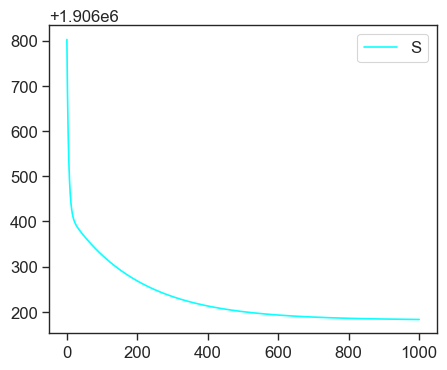

In [19]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[0], linestyle="-", label="S", color="cyan", alpha=0.95, zorder=3)
ax.legend()

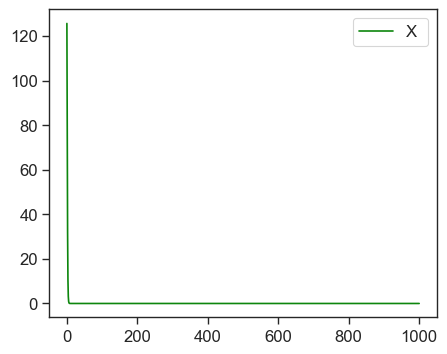

In [145]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[4], linestyle="-", label="X ", color="green", alpha=0.95, zorder=3)
ax.legend()

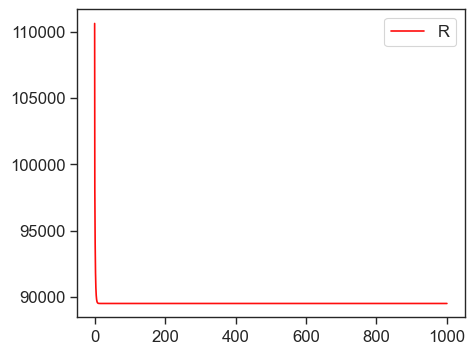

In [146]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[1], linestyle="-", label="R", color="red", alpha=0.95, zorder=3)
ax.legend() 

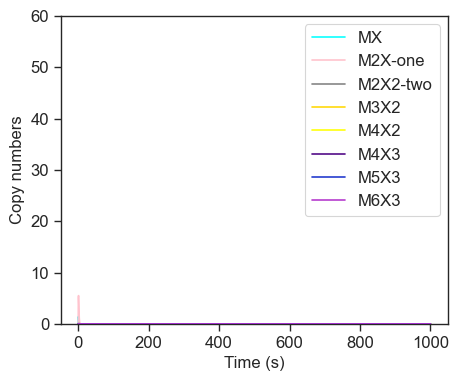

In [118]:
fig, ax = plt.subplots(figsize=(5,4))
#ax.plot(self.timePoints, copies[2], linestyle="-", label="Monomer on membrane", color="black", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[5], linestyle="-", label="MX", color="cyan", alpha=0.95, zorder=3)
       # ax.plot(self.timePoints, copies[4], linestyle="-", label="X", color="blue", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[7], linestyle="-", label="M2X-one", color="pink", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[9], linestyle="-", label="M2X2-two", color="gray", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[11], linestyle="-", label="M3X2", color="gold", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[13], linestyle="-", label="M4X2", color="yellow", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[16], linestyle="-", label="M4X3", color="indigo", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[18], linestyle="-", label="M5X3", color=(0.1, 0.2, 0.8), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[20], linestyle="-", label="M6X3", color=(0.7, 0.2, 0.8), alpha=0.95, zorder=3)
        
        #ax.plot(self.timePoints, copies[2], linestyle="-", label="Membrane monomer", color="blue", alpha=0.95, zorder=3)
        #ax.plot(self.timePoints, copies[3], linestyle="-", label="Membrane dimer", color="cyan", alpha=0.95, zorder=3)
ax.set_xlabel("Time (s)")
       #
ax.set_ylabel("Copy numbers")
#ax.set_xlim(0, 10)
ax.set_ylim(0, 60)
ax.legend()

final dimer copies:  6323.929541800907


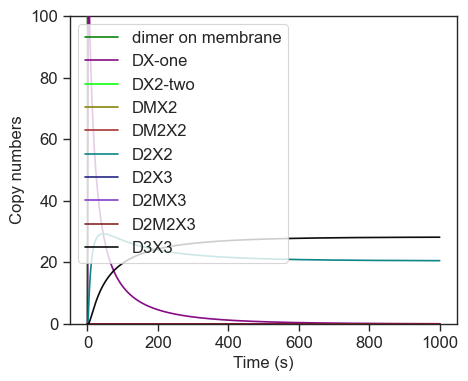

In [119]:
fig, ax = plt.subplots(figsize=(5,4))
ax.plot(model.timePoints, copies[3], linestyle="-", label="dimer on membrane", color="green", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[8], linestyle="-", label="DX-one", color="purple", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[10], linestyle="-", label="DX2-two", color="lime", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[12], linestyle="-", label="DMX2", color="olive", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[14], linestyle="-", label="DM2X2", color="brown", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[15], linestyle="-", label="D2X2", color="teal", alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[17], linestyle="-", label="D2X3", color=(0.1, 0.1, 0.5), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[19], linestyle="-", label="D2MX3", color=(0.5, 0.2, 0.8), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[21], linestyle="-", label="D2M2X3", color=(0.5, 0.1, 0.1), alpha=0.95, zorder=3)
ax.plot(model.timePoints, copies[22], linestyle="-", label="D3X3", color="black", alpha=0.95, zorder=3)
        
        #ax.plot(self.timePoints, copies[2], linestyle="-", label="Membrane monomer", color="blue", alpha=0.95, zorder=3)
        #ax.plot(self.timePoints, copies[3], linestyle="-", label="Membrane dimer", color="cyan", alpha=0.95, zorder=3)
ax.set_xlabel("Time (s)")
       #
ax.set_ylabel("Copy numbers")
print("final dimer copies: ",copies[3,-1])
        #ax.set_xlim(0, 10)
ax.set_ylim(0, 100)
ax.legend()

In [120]:

#create a plot of parameter ranges found
fileName = "../data/testParms_preStimOnly_7257.txt"

#THIS COMMAND BELOW BREAKS THE MODEL DEFINITION.
#model.plot_parameter_ranges_summary(percent=10, parameter_ranges = parameter_ranges, inputFile = fileName)


#best = 300
#totalTime = 10
#dt = 0.1
#model.filter_and_store_solutions(best=best, totalTime=totalTime, dt=dt)

In [121]:
#read in all solutions in the output file.

dataF = pd.read_csv(fileName, sep=",", engine="python")
dataF.columns = dataF.columns.str.strip()
dataF = dataF.sort_values(by="Rank")
print(dataF.shape)
print(dataF.loc[0])
#store the parameters in the param_cols vector
param_cols = [col for col in dataF.columns if col not in ["Rank", "Fitness"]]
print(param_cols)




(8181, 19)
Rank          0.000000
Fitness      -0.511000
kfsr          0.004117
krsr          0.111420
kfmm          0.001477
krmm          0.013793
kfmx          4.126500
krmx          0.140940
kfc           1.072100
krc           1.525800
kfxx          2.194300
krxx          2.175700
sig           3.526100
eDF           0.009837
kfdd          0.028099
stimUpSR      2.842600
S0            0.020961
R0          602.590000
X0            0.114800
Name: 0, dtype: float64
['kfsr', 'krsr', 'kfmm', 'krmm', 'kfmx', 'krmx', 'kfc', 'krc', 'kfxx', 'krxx', 'sig', 'eDF', 'kfdd', 'stimUpSR', 'S0', 'R0', 'X0']


In [122]:
whichRow=1000
# Convert row to array of parameter values
sol=model.simulate_pre(test_candidate)
print(sol[0])
print(test_candidate)
fit = model.fitness_function_to_call(test_candidate)
print("fitness of this candidate: ", fit)

[4.97675071 4.971803   4.97083502 ... 4.9683705  4.9683705  4.9683705 ]
[1.1990145978837494, 64.84254182874511, 0.3838997280253884, 0.5427768726647392, 1.782850339268213, 148.8899140208131, 10, 1.9088670410827975, 1.8204514120747222, 0.0197967436179174, 0.001621974347079779, 0.011528162104348018, 0.5023000634811141, 3.676618776948492, 4.9767507118835805, 88.0721048124962, 0.1]
CHI PRE STIMULATION
Cluster density chi: Simulated 0.022417307175416047, Experimental 0.024375, Chi -0.032252980474340553
Small cluster density chi: Simulated 0.016351887651210095, high density 0.022417307175416047, Chi -0.1411015693366849
Percent of mem munc13 in clusters: 0.7998423769037163%. Percent munc13 on the membrane: 0.16838723257354213%. Monomer mem: 38.92856716265567%. Dimer mem: 29.941055065869076%
Change in density over last 25%: 0.00010745672132601511, associated chi: -0.00038652497925569234
**CHI POST STIMULATION
Cluster density chi: Simulated 0.02246058824986377, Experimental 0.04125, Chi -1.03740

[4.1175e-03 1.6499e-01 1.4767e-03 2.2286e-02 4.1265e+00 1.4094e-01
 8.2570e-01 1.1986e+00 2.1943e+00 2.8236e+00 2.5048e+00 9.9788e-03
 1.5080e-02 2.0033e+00 2.0961e-02 4.1175e+02 1.6689e-01]
CHI PRE STIMULATION
Cluster density chi: Simulated 0.009378415508032138, Experimental 0.024375, Chi -1.8926289245473744
Small cluster density chi: Simulated 0.001104378947411838, high density 0.009378415508032138, Chi -0.0016653739660862418
Percent of mem munc13 in clusters: 16.51181942656662%. Percent munc13 on the membrane: 0.804888664544346%. Monomer mem: 62.92472036206619%. Dimer mem: 0.05853412199501962%
Change in density over last 25%: 0.003166402160067557, associated chi: -0.16875706259939577
**CHI POST STIMULATION
Cluster density chi: Simulated 0.031963975765949754, Experimental 0.04125, Chi -0.2533854797439662
Small cluster density chi: Simulated 0.0021836355597353893, high density 0.031963975765949754, Chi 0
Percent of mem munc13 in clusters: 28.32619853065332%. Percent munc13 on the memb

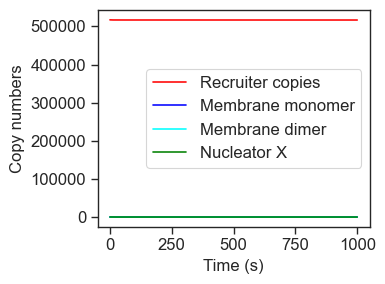

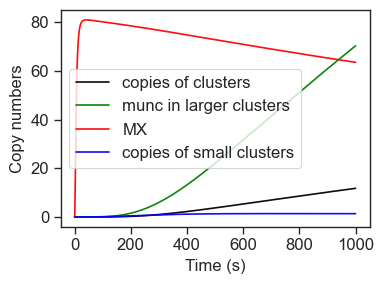

<Figure size 640x480 with 0 Axes>

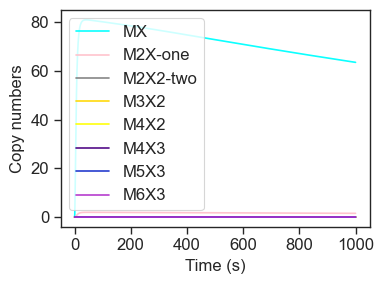

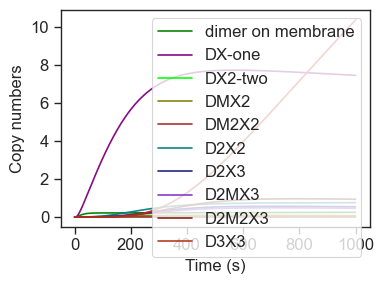

In [104]:

whichRow=3003


candidate = dataF.loc[whichRow][param_cols].values  # Gets all parameter columns for row 50
whichSol = model.simulate_pre(candidate)
print(candidate)
fit = model.fitness_function_to_call(candidate)
print("fitness of this candidate: ", fit)
model.test_mass_conservation(whichSol)
model.plot_freespecies_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_mycluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
plt.figure()
model.plot_each_cluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
model.plot_DX_cluster_time(whichSol, figsize=(4, 3), fontsize=12, dpi=300)
#model.plot_cluster_kinetic(sol, figsize=(4, 3), fontsize=12

#### We select the solution #3 in the following results (the last cell can be used to save all results of one solution in a single figure to pick nice solutions)

##### WT
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_wt(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### DC2A
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_dc2a(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### shRNA RIM2
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_shrim(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### DC2B
Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

In [ ]:
model.plot_diffusivity_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_dc2b(select=3, figsize=(4, 3), fontsize=12, dpi=300)

##### Endogenous level
experiment observe much slower mobility, and still a slow-down following stimulation

Total recruitment before and after STIM

In [ ]:
model.plot_total_recruitment_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Kinetic of cluster recruitment

In [ ]:
model.plot_cluster_recruitment_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Diffusivity

#### Save all results of one solution in a single figure to pick nice solutions

In [ ]:
model.plot_diffusivity_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Population: Monomer, Dimer, Cluster

In [ ]:
model.plot_population_endogenous(select=3, figsize=(4, 3), fontsize=12, dpi=300)

Plot the ranges of parameters in the best 10% solutions

In [ ]:
model.plot_parameter_ranges_summary(percent=10)

In [ ]:
model.plot_parms(percent=10)

In [ ]:
model.plot_all_diffusion()

In [ ]:
model.plot_cluster_kinetic(select=3, figsize=(6, 4), fontsize=12, dpi=300)

In [ ]:
# save all results of one solution in a single figure
# model.save_individual_solution_figures_combined(best=300)